In [1]:
%run "galaxyclusters.py"

In [4]:
import json
import numpy as np
import pandas as pd

galaxies_json_fname = "cluster_and_field_galaxies_data.json"
with open(galaxies_json_fname, "r") as galaxies_file:
    galaxies_dict = json.load(galaxies_file)

In [5]:
print(galaxies_dict["header_field"])
column_names = ['ra [°]', 'dec [°]', 'R [asec]', 'z', 'Da [Mpc]', 'θ_diam [rad]', 'd [kpc]']

['ra', 'dec', 'deVRad_r', 'z', 'Da [Mpc]', 'theta [rad]', 'd [kpc]']


In [6]:
tables_style = {"selector": "caption",  
                "props": [("caption-side", "bottom"),
                          ("color", "black")]
               }

In [7]:
# FIELD #
# Cluster name (or field)
cluster_name = "field"
data_galaxies = galaxies_dict["data_" + cluster_name]

df_galaxies_field = pd.DataFrame(data_galaxies, columns=column_names)
df_galaxies_field.index = np.arange(1, len(data_galaxies) + 1)

In [8]:
# VIRGO #
cluster_name = "virgo"
data_galaxies = galaxies_dict["data_" + cluster_name]

df_galaxies_virgo = pd.DataFrame(data_galaxies, columns=column_names)
df_galaxies_virgo.index = np.arange(1, len(data_galaxies) + 1)

In [9]:
# COMA #
cluster_name = "coma"
data_galaxies = galaxies_dict["data_" + cluster_name]

df_galaxies_coma = pd.DataFrame(data_galaxies, columns=column_names)
df_galaxies_coma.index = np.arange(1, len(data_galaxies) + 1)

In [13]:
# ABELL85 #
cluster_name = "abell85"
data_galaxies = galaxies_dict["data_" + cluster_name]

df_galaxies_abell85 = pd.DataFrame(data_galaxies, columns=column_names)
df_galaxies_abell85.index = np.arange(1, len(data_galaxies) + 1)

In [14]:
table_field_galaxies = df_galaxies_field.head(10)
caption = "Table 2: Datos de galaxias de campo a z>0.1, incluyendo su tamaño físico"
table_field_galaxies.style.set_caption(caption).set_table_styles([tables_style])

,ra [°],dec [°],R [asec],z,Da [Mpc],θ_diam [rad],d [kpc]
1,203.622,13.1137,4.8072,0.186892,638.433,4.66119e-05,29.7586
2,202.302,13.6497,1.87581,0.143481,513.675,1.81884e-05,9.34293
3,201.661,13.3364,1.53156,0.150226,534.045,1.48504e-05,7.93077
4,201.131,14.0988,5.48727,0.359472,1029.89,5.32061e-05,54.7966
5,201.131,14.1613,2.95986,0.15019,533.752,2.86997e-05,15.3185
6,201.648,13.3489,5.69067,0.149507,531.963,5.51783e-05,29.3528
7,200.997,13.6498,3.29677,0.491788,1243.1,3.19664e-05,39.7373
8,200.991,15.0287,0.580912,0.405585,1111.38,5.6327e-06,6.26007
9,201.992,13.4914,0.329477,0.436913,1162.31,3.1947e-06,3.71321
10,202.064,13.3875,5.1167,0.144455,516.687,4.96129e-05,25.6344


In [15]:
table_virgo_galaxies = df_galaxies_virgo.head(10)
caption = "Table 3: Datos de galaxias de Virgo Cluster, incluyendo su tamaño físico"
table_virgo_galaxies.style.set_caption(caption).set_table_styles([tables_style])

,ra [°],dec [°],R [asec],z,Da [Mpc],θ_diam [rad],d [kpc]
1,190.759,11.698,4.09239,0.0036885,15.1309,3.96809e-05,0.60041
2,189.135,13.7484,29.6679,0.00290679,12.1991,0.000287668,3.50929
3,189.128,13.6383,29.6708,0.00251121,10.5273,0.000287696,3.02866
4,189.54,13.5809,0.314362,0.0020293,8.4263,3.0481e-06,0.02568
5,190.61,11.7403,29.6675,0.00375927,15.5547,0.000287664,4.47452
6,190.481,11.6677,0.403459,0.00236924,9.6854,3.912e-06,0.03789
7,190.782,12.0512,29.6743,0.00672419,28.0627,0.00028773,8.07448
8,190.414,12.2475,29.6745,0.00309232,12.6241,0.000287732,3.63235
9,190.741,12.287,29.669,0.00559601,23.0755,0.000287679,6.63833
10,185.324,11.5104,29.6741,0.00111957,4.6398,0.000287728,1.335


In [16]:
table_coma_galaxies = df_galaxies_coma.head(10)
caption = "Table 4: Datos de galaxias de Coma Cluster, incluyendo su tamaño físico"
table_coma_galaxies.style.set_caption(caption).set_table_styles([tables_style])

,ra [°],dec [°],R [asec],z,Da [Mpc],θ_diam [rad],d [kpc]
1,194.629,28.2336,10.5013,0.0242939,99.2769,0.000101823,10.1087
2,195.633,27.9355,6.2187,0.022083,90.4849,6.02982e-05,5.45608
3,195.504,27.653,8.10381,0.0236465,96.8832,7.85767e-05,7.61276
4,194.659,27.8226,15.5133,0.0179876,73.9779,0.000150421,11.1278
5,194.721,27.8134,6.20978,0.0184203,76.0072,6.02117e-05,4.57653
6,194.728,27.7956,6.37435,0.0215821,88.4843,6.18075e-05,5.46899
7,194.736,27.822,7.56097,0.0290466,118.299,7.33132e-05,8.67289
8,194.979,27.796,3.39413,0.0275063,112.374,3.29104e-05,3.69829
9,195.034,27.7733,9.16763,0.0289249,117.897,8.88918e-05,10.4801
10,194.449,27.7694,5.24961,0.0192827,79.2284,5.09016e-05,4.03286


In [17]:
table_abell85_galaxies = df_galaxies_abell85.head(10)
caption = "Table 5: Datos de galaxias de Abell85 Cluster, incluyendo su tamaño físico"
table_abell85_galaxies.style.set_caption(caption).set_table_styles([tables_style])

,ra [°],dec [°],R [asec],z,Da [Mpc],θ_diam [rad],d [kpc]
1,10.2101,-9.22312,2.98555,0.0539636,213.558,2.89487e-05,6.18222
2,10.3038,-9.15011,2.40519,0.0530929,210.217,2.33214e-05,4.90255
3,10.2578,-9.20921,3.76694,0.0539191,213.558,3.65253e-05,7.80027
4,10.5782,-9.25791,3.35948,0.0557585,220.233,3.25744e-05,7.17396
5,10.6009,-9.27126,6.37464,0.0605566,237.885,6.18102e-05,14.7037
6,10.5307,-9.23847,3.80433,0.0556262,219.862,3.68879e-05,8.11023
7,10.3267,-9.48658,2.39092,0.057982,228.351,2.3183e-05,5.29388
8,10.3292,-9.38985,5.11585,0.0497457,197.882,4.96046e-05,9.81585
9,10.3315,-9.41908,2.2152,0.0546439,216.161,2.14792e-05,4.64296
10,10.3406,-9.32862,1.31426,0.0541519,214.305,1.27434e-05,2.73097


In [18]:
# function to build Galaxy Sizes Histograms given a pandas DataFrame 
def galaxy_sizes_histogram(df_group_of_galaxies, max_x_axis=60, size_x_grid_sep=4, 
                           xrot=0, figure_n=1, galaxy_group_name="Field"):
    histogram_field_galaxies = df_group_of_galaxies.hist(
        column="d [kpc]", bins=15, range=[0, max_x_axis], 
        xlabelsize=12, ylabelsize=12, xrot=xrot)

    histogram_field_galaxies[0][0].set_title(
        "Figure " + str(figure_n) + ":  Number of " 
        + galaxy_group_name + " Galaxies = f(d)")
    histogram_field_galaxies[0][0].set_xlabel("d [kpc]")
    histogram_field_galaxies[0][0].set_ylabel("Number of Galaxies")

    major_ticks = np.arange(0, max_x_axis, size_x_grid_sep)
    ax = histogram_field_galaxies[0][0]
    ax.set_xticks(major_ticks, minor=False)
    ax.set_xlim(0, max_x_axis)

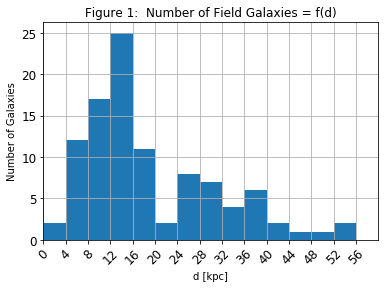

In [19]:
galaxy_sizes_histogram(df_galaxies_field, max_x_axis=60, xrot=45, 
                       figure_n=1, galaxy_group_name = "Field")

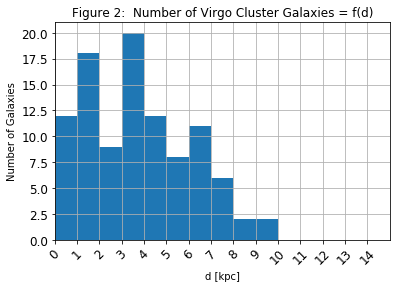

In [20]:
galaxy_sizes_histogram(df_galaxies_virgo, max_x_axis=15, size_x_grid_sep=1, 
                       xrot=45, figure_n=2, galaxy_group_name = "Virgo Cluster")

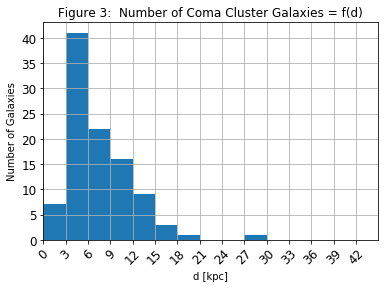

In [21]:
galaxy_sizes_histogram(df_galaxies_coma, max_x_axis=45, size_x_grid_sep=3, 
                       xrot=45, figure_n=3, galaxy_group_name = "Coma Cluster")

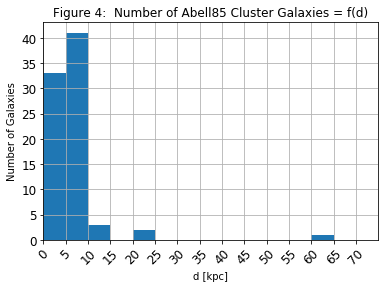

In [22]:
galaxy_sizes_histogram(df_galaxies_abell85, max_x_axis=75, size_x_grid_sep=5, 
                       xrot=45, figure_n=4, galaxy_group_name = "Abell85 Cluster")

In [23]:
# Constructing a pandas DataFrame with all the galaxy sizes

field_galaxy_sizes = list(df_galaxies_field['d [kpc]'])
virgo_galaxy_sizes = list(df_galaxies_virgo['d [kpc]'])
coma_galaxy_sizes = list(df_galaxies_coma['d [kpc]'])
abell85_galaxy_sizes = list(df_galaxies_abell85['d [kpc]'])

all_galaxy_sizes = (field_galaxy_sizes + virgo_galaxy_sizes 
                    + coma_galaxy_sizes + abell85_galaxy_sizes)

df_all_galaxies = pd.DataFrame(all_galaxy_sizes, columns=["d [kpc]"])

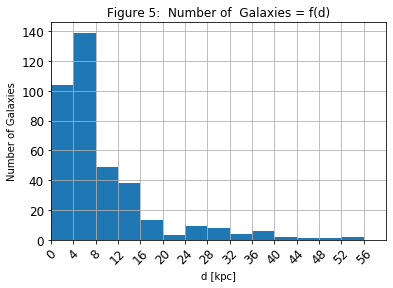

In [24]:
# Pandas histogram with all the galaxy sizes

galaxy_sizes_histogram(df_all_galaxies, max_x_axis=60, size_x_grid_sep=4, 
                       xrot=45, figure_n=5, galaxy_group_name = "")

In [25]:
# Statistical study of galaxy sizes for the sample of 380 galaxies in this work 
# Results are given by cluster/field galaxies and finally the global numbers are computed

In [26]:
# Statistical study of galaxy sizes [kpc] for Field Galaxies

def avg_std_galaxy_sizes(group_galaxy_sizes, group_str = "Field"):
    avg_group_galaxy_sizes = "{0:.2f}".format(np.average(group_galaxy_sizes))
    std_group_galaxy_sizes = "{0:.2f}".format(np.std(group_galaxy_sizes))

    print("Average of " + group_str + " Galaxy Sizes:")
    print(avg_group_galaxy_sizes)
    print()
    print("Standard Deviation of " + group_str + " Galaxy Sizes:")
    print(std_group_galaxy_sizes)

In [27]:
# Statistical study of galaxy sizes [kpc] for Field Cluster
avg_std_galaxy_sizes(field_galaxy_sizes, group_str = "Field")

Average of Field Galaxy Sizes:
19.09

Standard Deviation of Field Galaxy Sizes:
11.77


In [28]:
# Statistical study of galaxy sizes [kpc] for Virgo Cluster
avg_std_galaxy_sizes(virgo_galaxy_sizes, group_str = "Virgo Cluster")

Average of Virgo Cluster Galaxy Sizes:
3.76

Standard Deviation of Virgo Cluster Galaxy Sizes:
2.39


In [29]:
# Statistical study of galaxy sizes [kpc] for Coma Cluster
avg_std_galaxy_sizes(coma_galaxy_sizes, group_str = "Coma Cluster")

Average of Coma Cluster Galaxy Sizes:
7.55

Standard Deviation of Coma Cluster Galaxy Sizes:
4.42


In [30]:
# Statistical study of galaxy sizes [kpc] for Abell85 Cluster
avg_std_galaxy_sizes(abell85_galaxy_sizes, group_str = "Abell85 Cluster")

Average of Abell85 Cluster Galaxy Sizes:
6.68

Standard Deviation of Abell85 Cluster Galaxy Sizes:
7.13


In [31]:
# Global galaxy sizes [kpc] statistical study for the 380 galaxies of our sample
avg_std_galaxy_sizes(all_galaxy_sizes, group_str = "All")

Average of All Galaxy Sizes:
9.41

Standard Deviation of All Galaxy Sizes:
9.45
